# IMPORTING LIBRARIES

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# LOADING THE DATASET

In [82]:
df = pd.read_csv("IRIS.csv")


In [83]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# INFORMATION OF DATASET

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [85]:
# Total Columns - 5
# Total Rows - 150
# Dtype which assign to the columns are correct

# FINDING THE MISSING VALUES AND NAN VALUES 

In [86]:
print("sepal_length:")
print("Null_values:",df['sepal_length'].isna().sum())
print("value counts:\n",df['sepal_length'].value_counts())


sepal_length:
Null_values: 0
value counts:
 5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64


In [87]:
print("sepal_width:")
print("Null_values:",df['sepal_width'].isna().sum())
print("value counts:\n",df['sepal_width'].value_counts())


sepal_width:
Null_values: 0
value counts:
 3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64


In [88]:
print("petal_length:")
print("Null_values:",df['petal_length'].isna().sum())
print("value counts:\n",df['petal_length'].value_counts())


petal_length:
Null_values: 0
value counts:
 1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal_length, dtype: int64


In [89]:
print("petal_width:")
print("Null_values:",df['petal_width'].isna().sum())
print("value counts:\n",df['petal_width'].value_counts())


petal_width:
Null_values: 0
value counts:
 0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64


In [90]:
# There is no missing values and Nan values in the dataset

# OUTLIERS

In [91]:
col = df.select_dtypes('float64').columns

In [92]:
col

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

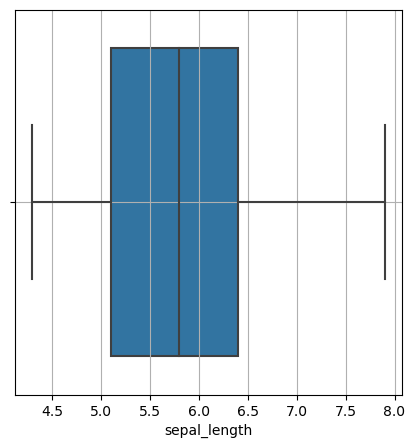

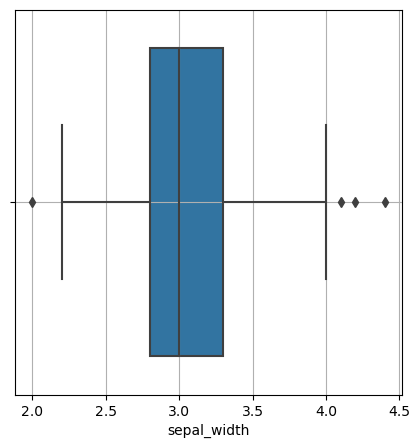

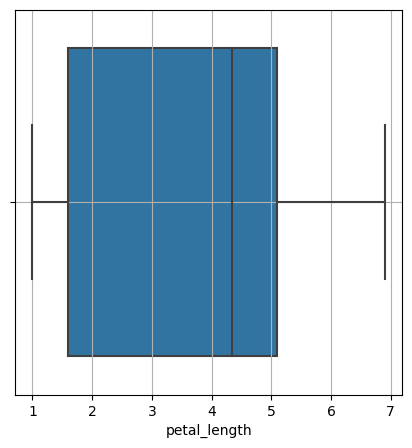

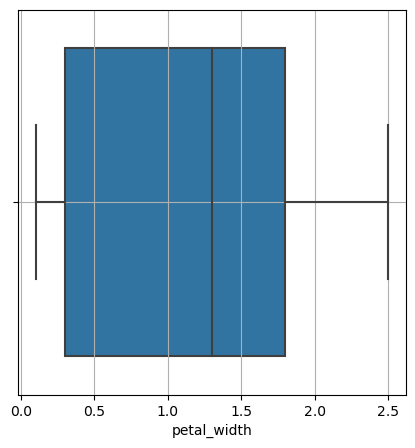

In [93]:
for i in col:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.grid()


In [30]:
# except sepal width other columns don't have outliers

In [31]:
q3 = df["sepal_width"].quantile(0.75)
q1 = df["sepal_width"].quantile(0.25)
iqr = q3-q1
iqr

0.5

In [32]:
upper_whisker = q3+1.5*iqr
lower_whisker = q1-1.5*iqr

In [33]:
print(iqr)
print(upper_whisker)
print(lower_whisker)

0.5
4.05
2.05


In [34]:
upper_whisker_value = df[(df["sepal_width"] > upper_whisker)].index
upper_whisker_value


Int64Index([15, 32, 33], dtype='int64')

In [35]:
lower_whisker_value = df[(df["sepal_width"] < lower_whisker)].index
lower_whisker_value

Int64Index([60], dtype='int64')

In [44]:
df.loc[upper_whisker_value,"sepal_width"] = np.nan
df.fillna(upper_whisker,inplace=True)

In [45]:
df.loc[lower_whisker_value,"sepal_width"] = np.nan
df.fillna(lower_whisker,inplace=True)

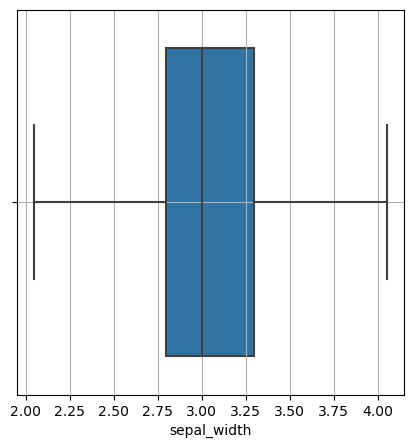

In [46]:
plt.figure(figsize=(5,5)) 
sns.boxplot(df['sepal_width'])
plt.grid()

In [47]:
# The outliers in sepal_width has been cleared

## PAIRPLOT

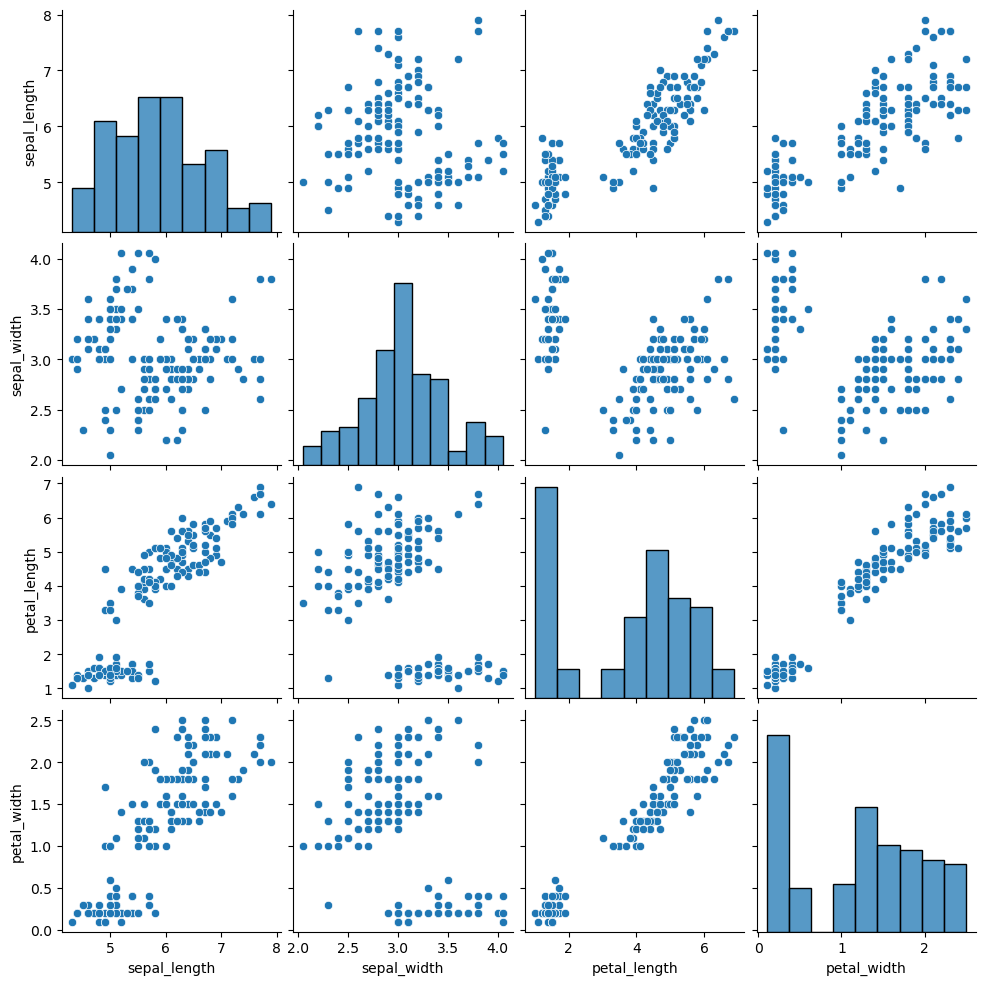

In [48]:
sns.pairplot(df)

## SKEW

In [49]:
from scipy.stats import skew

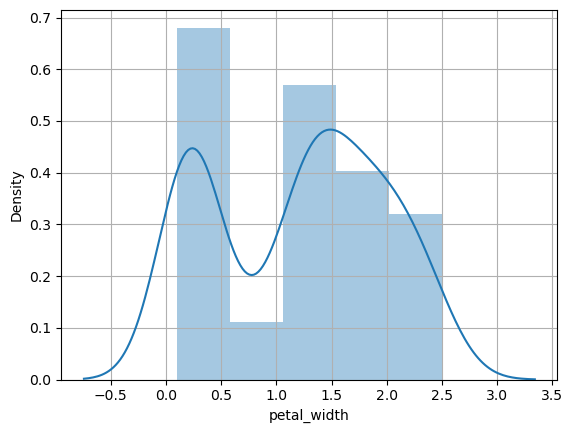

In [96]:
df["sepal_length"]
skew(df['sepal_length'])
plt.figure()
sns.distplot(df[i])
plt.grid()
plt.show()

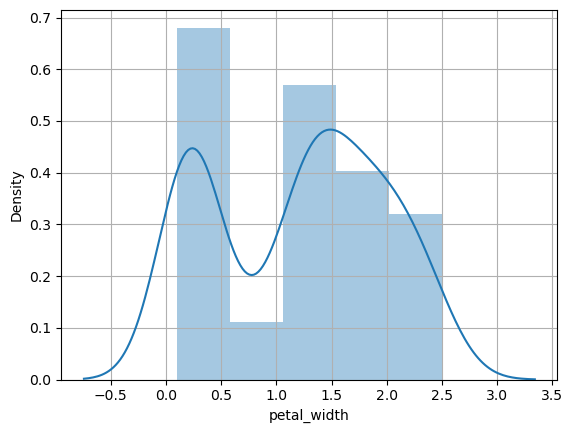

In [97]:
df["sepal_width"]
skew(df['sepal_width'])
plt.figure()
sns.distplot(df[i])
plt.grid()
plt.show()

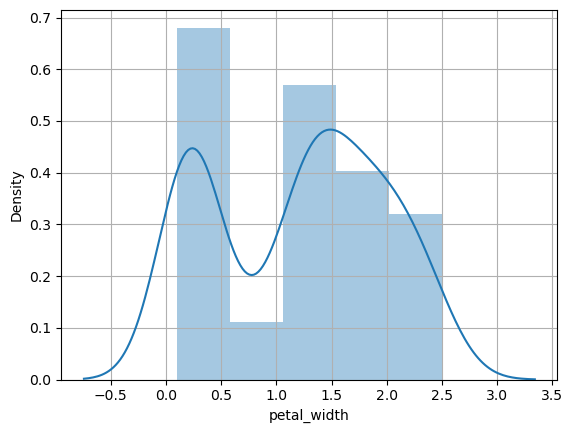

In [98]:
df["petal_length"]
skew(df['petal_length'])
plt.figure()
sns.distplot(df[i])
plt.grid()
plt.show()

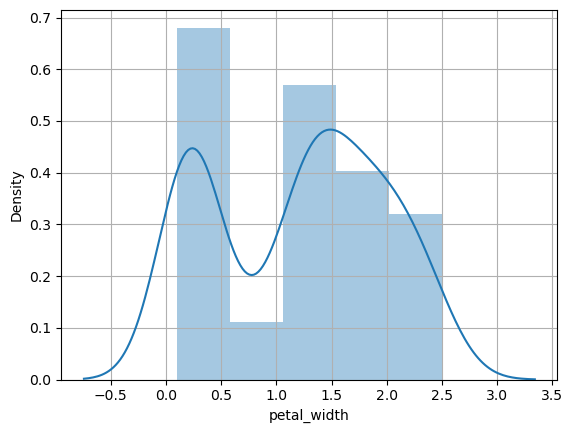

In [99]:
df["petal_width"]
skew(df['petal_width'])
plt.figure()
sns.distplot(df[i])
plt.grid()
plt.show()

## CORRELATION

In [52]:
df.corr().style.background_gradient()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.110343,0.871754,0.817954
sepal_width,-0.110343,1.000000,-0.419823,-0.355582
petal_length,0.871754,-0.419823,1.000000,0.962757
petal_width,0.817954,-0.355582,0.962757,1.000000


## ENCODING

In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['species'] = oe.fit_transform(df[['species']])

## SEPERATING FEATURE AND TARGET

In [57]:
feature = df.iloc[:,:-1]
target = df['species']

## SPLITING XTRAIN,XTEST,YTRAIN,YTEST

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size=0.3,random_state=1)

## TRAINING THE MODEL USING KneighborsClassifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)


array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 2., 1., 0., 0., 1., 2., 1., 2., 1., 2.,
       2., 0., 1., 0., 1., 2., 2., 0., 1., 2., 1.])

In [68]:
ypred = knn.predict(xtest)
ypred

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 2., 1., 0., 0., 1., 2., 1., 2., 1., 2.,
       2., 0., 1., 0., 1., 2., 2., 0., 1., 2., 1.])

In [69]:
ypred1 = knn.predict([[5.1,3.5,1.4,0.2]])
ypred1

array([0.])

## MODEL EVALUATION

In [73]:
from sklearn.metrics import classification_report

In [74]:
train = knn.score(xtrain, ytrain)
test = knn.score(xtest, ytest)
print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    

Training Accuracy : 0.9523809523809523
Testing Accuracy : 0.9777777777777777


